# Exploration des données de Maintenance FleetOpti
Ce notebook analyse l'état de la flotte et les besoins de maintenance.

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid")

In [ ]:
# Chargement des données
df = pd.read_csv('../data/vehicle_maintenance_data.csv')
df.head()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1


## Etat de la maintenance requis (Target Variable)

C:\Users\handy\AppData\Local\Temp\ipykernel_7096\375243201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Need_Maintenance', data=df, palette='viridis')


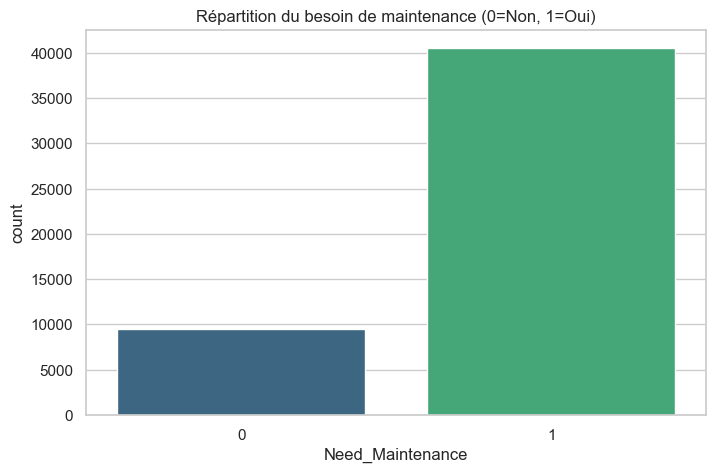

In [3]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Need_Maintenance', data=df, palette='viridis')
plt.title('Répartition du besoin de maintenance (0=Non, 1=Oui)')
plt.show()

## Maintenance par type de véhicule

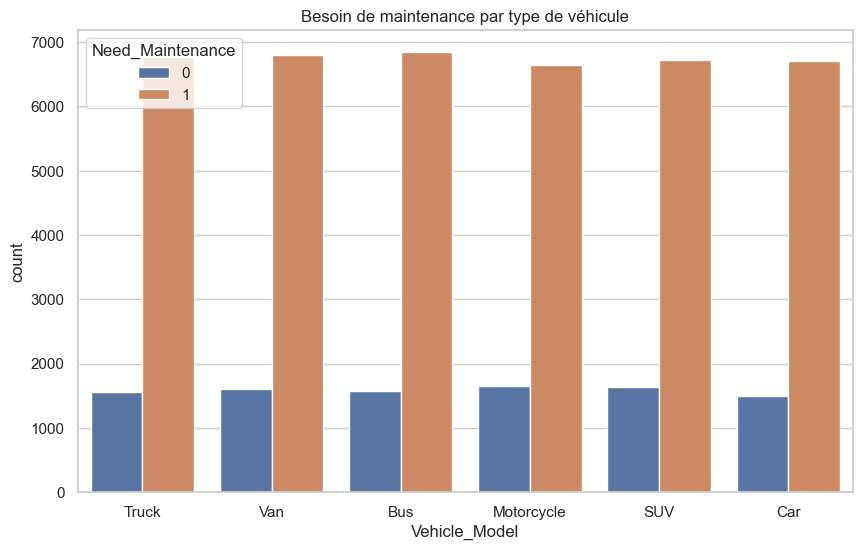

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Model', hue='Need_Maintenance', data=df)
plt.title('Besoin de maintenance par type de véhicule')
plt.show()

## Impact du kilométrage

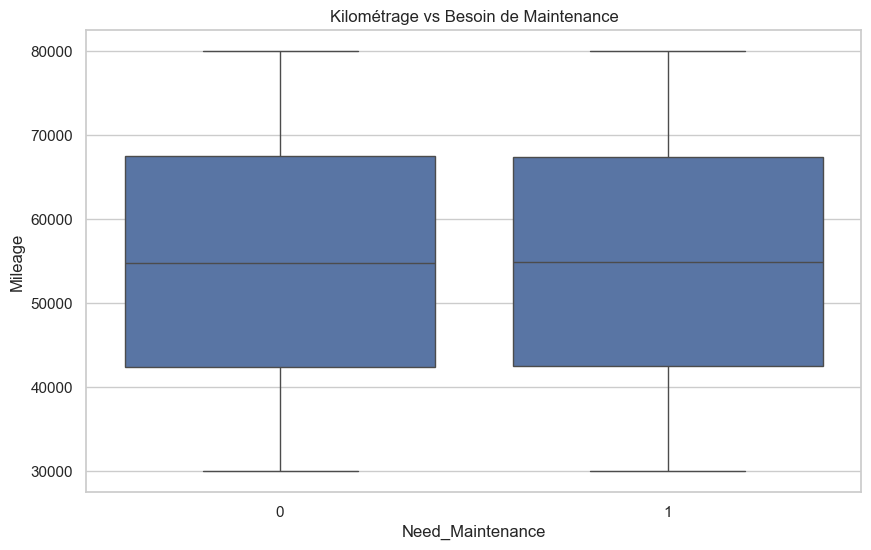

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Need_Maintenance', y='Mileage', data=df)
plt.title('Kilométrage vs Besoin de Maintenance')
plt.show()

## Condition des composants

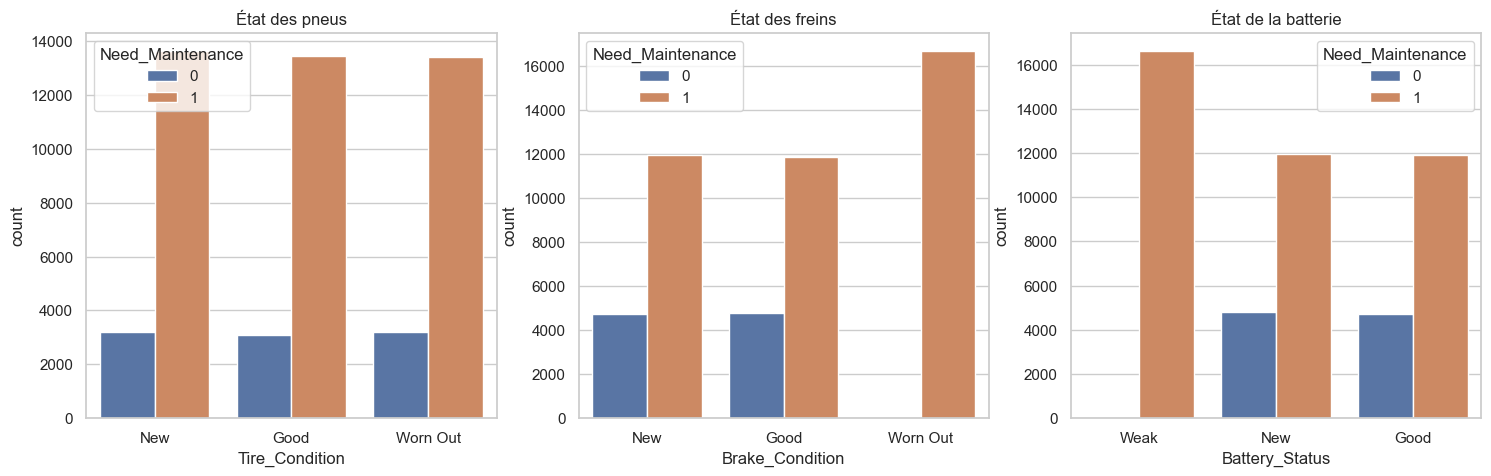

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='Tire_Condition', hue='Need_Maintenance', data=df, ax=axes[0])
axes[0].set_title('État des pneus')

sns.countplot(x='Brake_Condition', hue='Need_Maintenance', data=df, ax=axes[1])
axes[1].set_title('État des freins')

sns.countplot(x='Battery_Status', hue='Need_Maintenance', data=df, ax=axes[2])
axes[2].set_title('État de la batterie')

plt.show()

## Matrice de corrélation

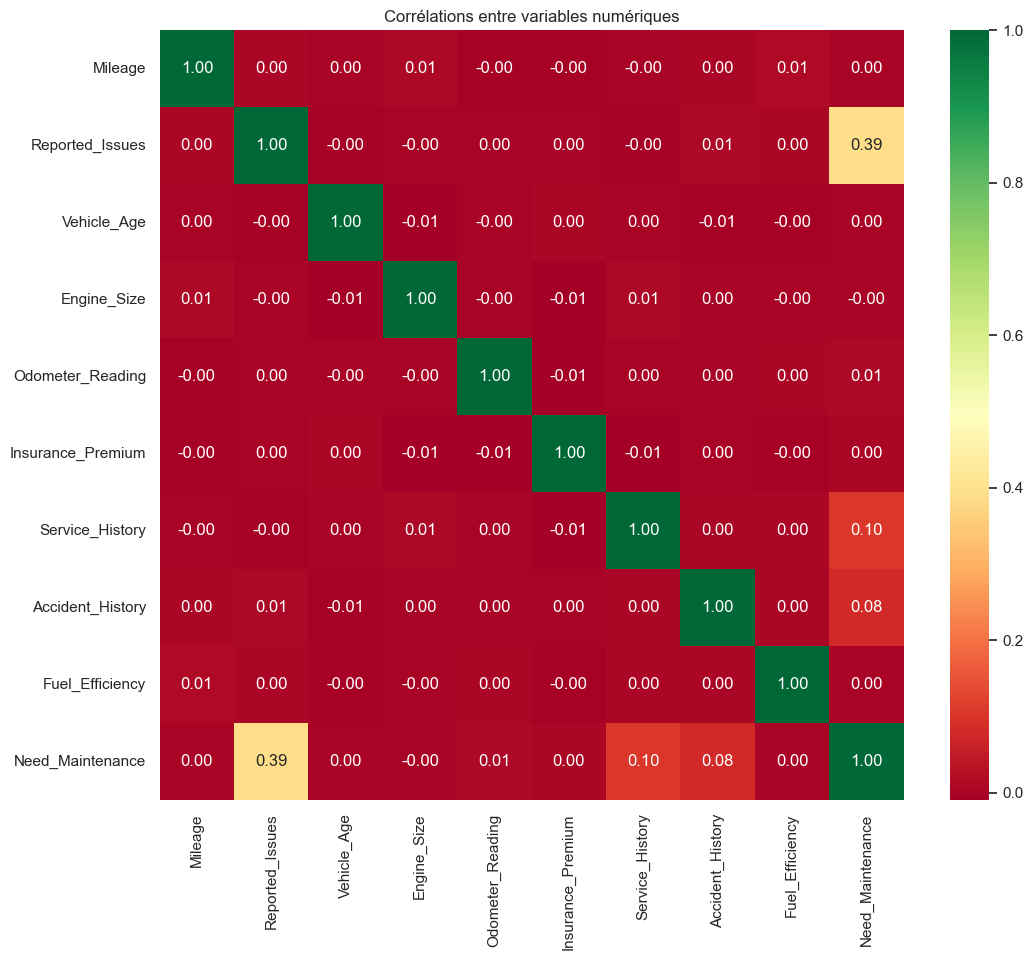

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(numeric_only=True), annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Corrélations entre variables numériques')
plt.show()